In [1]:
from concurrent.futures import ThreadPoolExecutor
from IPython.display import display, clear_output
import math
import numpy as np
from PIL import Image
from multiprocessing import Pool
import vapory

In [2]:
def create_scene(moment, is_box):
    angle = 2 * math.pi * moment / 360
    r_camera = 10
    camera = vapory.Camera('location', [r_camera * math.cos(angle), 1.5, r_camera * math.sin(angle)], 
                           'look_at', [0.0, 0.0, 0.0], 
                           'angle', 30)
    light1 = vapory.LightSource([2, 4, -3], 'color', [1, 1, 1], 'shadowless')
    light2 = vapory.LightSource([2, 4, 3], 'color', [1, 1, 1], 'shadowless')
    plane = vapory.Plane([0, 1, 0], -2, vapory.Pigment('color', [1, 1, 1]))
    box = vapory.Box([-1, -1, -1], [1, 1, 1], 
                     vapory.Pigment('Col_Glass_Clear'),
                     vapory.Finish('F_Glass9'),
                     vapory.Interior('I_Glass1'))
    sphere = vapory.Sphere( [0, 0, 0], 1 + (math.sqrt(2) - 1) / 2, vapory.Texture(vapory.Pigment('color', [0.7, 0.7, 0.7])))
    some_shape = box if is_box else sphere
    return vapory.Scene(camera, objects=[light1, light2, plane, some_shape], included=['glass.inc'])

In [3]:
class CreateRecordFiller:
    def __init__(self, n):
        self.n = n
        self.ds = np.zeros((2 * n, 100, 100, 3), dtype=np.uint8)    
    def __call__(self, ind):
        scene = create_scene(ind / 2, is_box=ind%2 == 0)
        pic = scene.render(width=100, height=100)
        self.ds[ind] = pic

In [4]:
n = 720

In [5]:
fill_record = CreateRecordFiller(n)

In [6]:
with ThreadPoolExecutor(40) as p:
    p.map(fill_record, range(n))

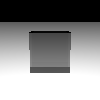

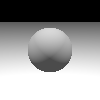

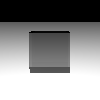

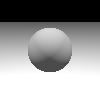

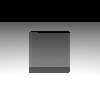

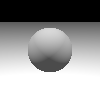

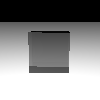

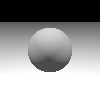

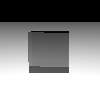

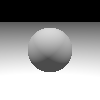

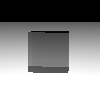

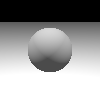

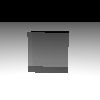

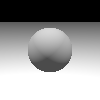

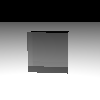

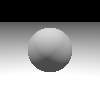

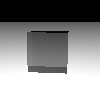

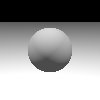

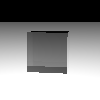

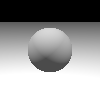

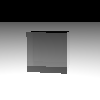

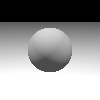

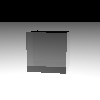

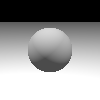

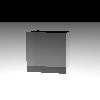

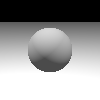

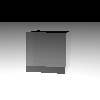

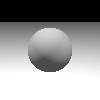

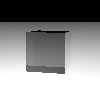

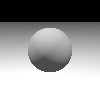

In [7]:
for t in range(30):
    display(Image.fromarray(fill_record.ds[t]))

In [8]:
np.savez('box_sphere_00', ds=fill_record.ds)